# Paquete SMEPY
## Autor: Erik Angulo

# Instalación

Esta es la guía de uso del paquete 'smer'. Está alojado en "github.com/erikangulo/smepy"

Este paquete se puede instalar fácilmente a través de la librería devtools, desde Github:

También se puede instalar a través del código fuente usando la consola de R.

Este paquete tiene dependencias únicamente para ciertas funciones concretas listadas a continuación. El paquete puede operar correctamente sin ellas excepto para las funciones mencionadas e indicará al usuario al ejecutar cada programa si necesita alguna dependencia.

* jupyter notebook
* pandas
* numpy
* seaborn
* matplotlib

Cargamos el paquete:

In [1]:
import smepy.dataset as ds 
import smepy.modifications as md
import smepy.statistics as st

# Uso

El objetivo de este paquete es facilitar la aplicación de cálculos y estadísticos en datos a usuarios que dispongan de poca experiencia en el ámbito de la programación. También es adecuado para conseguir los resultados deseados automáticamente en pocas líneas de código sin necesidad de programar nada. Entre las funciones disponibles, se encuentran la lectura y escritura de datasets, cálculo de la varianza, curva ROC, discretización, normalización y estandarización de variables, cálculo de la correlación, cálculo de la entropía y distintos gráficos que representen los resultados.

En este jupyter notebook presentaremos un tutorial de cómo usar el paquete


# Gestión de Dataset

En esta sección observaremos que son los Dataset y como podemos crearlos, cargarlos, guardarlos y visualizarlos.

## Creación de Dataset

Los Dataset son unas clases que funcionan como tablas, donde cada fila corresponde a instancias y las columnas a las variables. Cada variable será de un tipo, ya sea numérica, lógica o de caracteres. Los dataset, además de la tabla, tendrán un nombre.

Empecemos observando como se crea un Dataset.

Los Dataset se deben crear con estructura de diccionario, donde las llaves son el nombre de las columnas y los valores son el contenido de las columnas. El único requisito que tiene es que ha de tener como mínimo dos filas y una columna (pues para elementos con una fila independientemente de las columnas ya podemos trabajar con un vector normal y corriente).

A cada Dataset le podemos asignar un id o nombre, el cual se generará automáticamente con un número en caso de no especificarlo. Además, podemos decidir si factorizar alguna de sus columnas. De esta forma, aquellas que contengan menos valores distintos que el número indicado serán factorizadas.

In [2]:
prueba1 = [3,3,5,8,9,5]
prueba2 = ["A", "B", "D", "R", "S", "P"]
dictPrueba = {"N" : prueba1, "L": prueba2}

dsPrueba = ds.Dataset(dictPrueba)
print(dsPrueba)

Nombre del Dataset: 1
Columnas del Dataset: 2
Filas del Dataset: 6
Contenido del Dataset:
   N  L
0  3  A
1  3  B
2  5  D
3  8  R
4  9  S
5  5  P


También podemos cambiarles el nombre a las columnas deseadas o directamente a todas ellas. Para cada columna deseada se indicará mediante un diccionario como llave los nombres antiguos y como valores los nombres nuevos. Para cambiar todas las columnas a la vez basta con crear un array con los nuevos nombres para las columnas

In [3]:
dsPrueba.nombres_columna({"N":"Num"}) #cambiar la columna deseada
print(dsPrueba)
dsPrueba.nombres_columna(["Num", "Let"]) #todas las columnas
print(dsPrueba)

Nombre del Dataset: 1
Columnas del Dataset: 2
Filas del Dataset: 6
Contenido del Dataset:
   Num  L
0    3  A
1    3  B
2    5  D
3    8  R
4    9  S
5    5  P
Nombre del Dataset: 1
Columnas del Dataset: 2
Filas del Dataset: 6
Contenido del Dataset:
   Num Let
0    3   A
1    3   B
2    5   D
3    8   R
4    9   S
5    5   P


## Lectura y guardado de Dataset

Además de poder crear Dataset usando los comandos anteriores, también podemos crearlos desde un fichero. De la misma manera, podemos guardar un Dataset como fichero.

El guardado de ficheros está limitado a formato csv, pero la lectura puede ser de formato csv o derivados como tsv. Para ello es necesario indicar que separador usa (por defecto ",") y el caracter usado para los números decimales (por defecto "."). De igual manera podemos asignar un nombre al dataset creado. Si el fichero dispone de encabezado, es decir, nombres asignados a cada columna como la primera instancia del fichero, se usarán como nombres del Dataset, en caso contrario, deberá indicarse con el parámetro 'encabezado' como False.


In [4]:
dsPuntos = ds.leer_datos("LecturaCSV_R.csv", nombre="Puntos", encabezado=True, sep=",", decimal='.')
print(dsPuntos)

Nombre del Dataset: Puntos
Columnas del Dataset: 4
Filas del Dataset: 8
Contenido del Dataset:
   Intento  Puntuacion Participante  Conseguido
0        1         2.1         Juan        True
1        5         3.4         Pepe       False
2        8         5.6        Paula       False
3        5         2.3       Marisa        True
4        6         8.8        Nerea       False
5        4         5.5        Jorge       False
6        0         9.6         Juan       False
7        0         1.3        Paula        True


In [5]:
#ds.guardar_datos(dsPuntos, "Guardar.txt")

# Modificaciones del Dataset

En esta sección veremos diferentes modificaciones que podemos realizar a nuestro Dataset. En estos casos no se modificarán el Dataset original y obtendremos una copia con dichas modificaciones aplicadas. La modificación que se realice aparecerá reflejada en el nombre del Dataset con las modificaciones.

## Estandarizar y normalizar

La estandarización hace que los valores sigan una distribución normal con media 0 y desviación estandar 1, mientras que la normalización hace que los valores estén comprendidos en el rango entre 0 y 1, ambos incluídos.

Se normalizarán y estandarizarán automáticamente las columnas numéricas

In [6]:
print(md.normalizar(dsPuntos))

Nombre del Dataset: Puntos_norm
Columnas del Dataset: 4
Filas del Dataset: 8
Contenido del Dataset:
   Intento  Puntuacion Participante  Conseguido
0    0.125    0.096386         Juan        True
1    0.625    0.253012         Pepe       False
2    1.000    0.518072        Paula       False
3    0.625    0.120482       Marisa        True
4    0.750    0.903614        Nerea       False
5    0.500    0.506024        Jorge       False
6    0.000    1.000000         Juan       False
7    0.000    0.000000        Paula        True


In [7]:
print(md.estandarizar(dsPuntos))

Nombre del Dataset: Puntos_estand
Columnas del Dataset: 4
Filas del Dataset: 8
Contenido del Dataset:
    Intento  Puntuacion Participante  Conseguido
0 -0.882919   -0.874848         Juan        True
1  0.462481   -0.457489         Pepe       False
2  1.471531    0.248810        Paula       False
3  0.462481   -0.810639       Marisa        True
4  0.798831    1.276155        Nerea       False
5  0.126131    0.216706        Jorge       False
6 -1.219269    1.532991         Juan       False
7 -1.219269   -1.131684        Paula        True


## Filtrado

Podemos obtener un subconjunto del Dataset con los filtros que se consideren oportunos. Para ello, deberemos indicar en base a los valores de qué columna queremos filtrar y la función de filtrado. El filtro deberá ir entre comillas simples, y si se compara con valores estos tendrán comillas dobles. Si el nombre de la columna tiene espacios deberá estar entre el caracter `

In [8]:
#comparamos dos columnas entre sí y obtenemos las filas que cumplan dicha condición
print(md.filtrar(dsPuntos, 'Intento < Puntuacion'))

Nombre del Dataset: Puntos_filt
Columnas del Dataset: 4
Filas del Dataset: 5
Contenido del Dataset:
   Intento  Puntuacion Participante  Conseguido
0        1         2.1         Juan        True
4        6         8.8        Nerea       False
5        4         5.5        Jorge       False
6        0         9.6         Juan       False
7        0         1.3        Paula        True


In [9]:
#comparamos una columna con valor y obtenemos las filas que cumplan dicha condición
print(md.filtrar(dsPuntos, 'Participante == "Juan"'))

Nombre del Dataset: Puntos_filt
Columnas del Dataset: 4
Filas del Dataset: 2
Contenido del Dataset:
   Intento  Puntuacion Participante  Conseguido
0        1         2.1         Juan        True
6        0         9.6         Juan       False


## Discretizar

Mediante este proceso podemos factorizar las columnas numéricas en X tramos y sustituyendo cada elemento por el tramo al que pertenece. Esta factorización se denomina discretización.

Para discretizar el Dataset, deberemos indicar una o varias columnas numéricas, cuantos puntos de corte se desean (los puntos de corte delimitan los tramos), y que algoritmo se usará para inferir los puntos de corte que nos delimiten los tramos para posteriormente discretizar. En caso de no indicar columnas, la discretización se aplicará automáticamente a todas las columnas numéricas del Dataset

Uno de los algoritmos clásicos es equal width (igual anchura). Dado un vector de números reales y un número de intervalos, determina cuales son los puntos de corte para generar un vector categórico de tal manera que esos puntos están uniformemente distribuidos en el rango de los valores. Por ejemplo, si tenemos los valores (11.5, 10.2, 1.2, 0.5, 5.3, 20.5, 8.4) y queremos generar una variable categórica (su implementación en Python puede ser como un string) con cuatro posibles valores, tenemos que determinar tres puntos de corte, que serán valores que separen el intervalo (entre 0.5 y 20.5 en este caso) en 4 tramos de igual tamaño. Es decir, el primer tramo irá de 0.5 a 5.5, el segundo de 5.5 a 10.5, el tercero de 10.5 a 15.5 y el último de 15.5 a 20.5. Es decir, tendríamos 3 puntos de corte, 5.5, 10.5 y 15.5. Normalmente cuando se lleva a cabo esta tarea, ante un nuevo valor es necesario determinar a que intervalo pertence. Dado que cuando eso ocurre el valor puede estar fuera de los límites del vector original, el comienzo del primer tramos se suele considerar -infinito y el final del último como infinito. Es decir, una vez aplicado el algoritmo, el resultado sería un vector categórico de este estilo: '["I3", "I2", "I1", "I1", "I4", "I2"]', donde I1=(-infinito, 5.5], I2=(5.5, 10.5], I3=(10.5, 15.5], I4=(15.5, infinito). Otro de los algoritmos clásicos es equal frequency (igual frecuencia), donde el objetivo es buscar los puntos de corte que hagan que el número de valores del vector a discretizar que caen en cada uno de los intervalos sea el mismo (+- 1, según el número de intervalos y de puntos).

Además, en caso de usar otro algoritmo de otro paquete de inferencia de puntos de corte, podemos discretizar también nuestro dataset usando los puntos de corte obtenidos.

Veámos unos ejemplos.

Discretizar en 3 tramos las columnas numéricas del Dataset a través del método 'Igual Frecuencia'

In [10]:
print(md.discretizar(dsPuntos))

Nombre del Dataset: Puntos_frecuencia
Columnas del Dataset: 4
Filas del Dataset: 8
Contenido del Dataset:
    Intento  Puntuacion Participante  Conseguido
0  (-Inf,1]  (-Inf,2.3]         Juan        True
1     (1,5]   (2.3,5.5]         Pepe       False
2  (5,+Inf)  (5.5,+Inf)        Paula       False
3     (1,5]  (-Inf,2.3]       Marisa        True
4  (5,+Inf)  (5.5,+Inf)        Nerea       False
5     (1,5]   (2.3,5.5]        Jorge       False
6  (-Inf,1]  (5.5,+Inf)         Juan       False
7  (-Inf,1]  (-Inf,2.3]        Paula        True


Discretizar en 4 tramos la segunda columna numéricas del Dataset a través del método 'Igual Anchura'

In [11]:
print(md.discretizar(dsPuntos, columnas=["Puntuacion"], metodo="anchura", puntos_corte=4))

Nombre del Dataset: Puntos_anchura
Columnas del Dataset: 4
Filas del Dataset: 8
Contenido del Dataset:
   Intento    Puntuacion Participante  Conseguido
0        1  (-Inf,3.375]         Juan        True
1        5  (3.375,5.45]         Pepe       False
2        8  (5.45,7.525]        Paula       False
3        5  (-Inf,3.375]       Marisa        True
4        6  (7.525,+Inf)        Nerea       False
5        4  (5.45,7.525]        Jorge       False
6        0  (7.525,+Inf)         Juan       False
7        0  (-Inf,3.375]        Paula        True


Discretizar la columna Puntuacion con los puntos de corte proporcionados

In [12]:
print(md.discretizar(dsPuntos, columnas=["Puntuacion"], metodo="manual", puntos_corte=[2,4,6]))

Nombre del Dataset: Puntos_manual
Columnas del Dataset: 4
Filas del Dataset: 8
Contenido del Dataset:
   Intento Puntuacion Participante  Conseguido
0        1      (2,4]         Juan        True
1        5      (2,4]         Pepe       False
2        8      (4,6]        Paula       False
3        5      (2,4]       Marisa        True
4        6   (6,+Inf)        Nerea       False
5        4      (4,6]        Jorge       False
6        0   (6,+Inf)         Juan       False
7        0   (-Inf,2]        Paula        True


# Cálculo de estadísticos en el Dataset

En esta sección mostraremos diferentes estadísticos que podemos aplicar al Dataset y visualizaremos los resultados.

## Varianza y entropía

Podemos usar el comando 'varianzas' para obtener la varianza correspondiente a cada columna que sea numérica.


In [13]:
st.varianzas(dsPuntos)

Intento       8.839286
Puntuacion    9.702143
dtype: float64

Por defecto obtendremos la entropía normalizada, entre 0 y 1, el sistema se encarga en estos casos de detectar cuántos valores distintos hay. De todas formas, podemos obtenerla también sin normalizar si así quisiesemos. Por último, podemos representar las entropías a través de un gráfico también.

In [14]:
dfEst= {
    'A':[1,2,3,4,5,6,7,8,9,10],
    'B':[10, 20, 10, 10, 10, 30, 70, 80, 10, 90],
    'C':['Verde', 'Amarillo', 'Azul', 'Amarillo', 'Verde', 'Rojo', 'Rojo', 'Rojo', 'Verde', 'Azul'],
    'D':[0]*10
}
dsEst = ds.Dataset(dfEst)

A    1.000000
B    0.835975
C    0.985475
D         NaN
dtype: float64

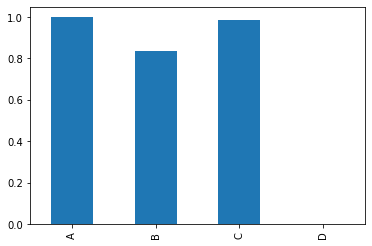

In [15]:
st.entropias(dsEst, normalizar=True, plot=True)

## Boxplot

Tener una idea de cómo son nuestros datos es interesante. Por ello, también se ofrece visualizar mediante un Boxplot cada columna del Dataset, simplemente usando la función 'graficoBoxplot'

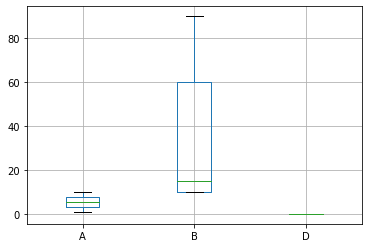

In [16]:
st.graficoBoxplot(dsEst)

## Correlaciones e información mútua

Es posible también observar cómo de relacionadas están las columnas del Dataset. Para las columnas numéricas usaremos 'correlaciones', mientras que para columnas discretas (factores y character) usaremos 'infmutuas'. Ambas funciones detectan automáticamente las columnas que son apropiadas. Podemos obtener también gráficos para analizar las relaciones.

In [17]:
dfEst2 = {'A': [33.33, 45.12, 84.32, 65.28, 14.67],
        'B': [20.46, 78.36, 76.41, 16.81, 13.19],
        'C': [8.91, 6.52, 13.35, 41.25, 30.40]
        }
dsEst2 = ds.Dataset(dfEst2)

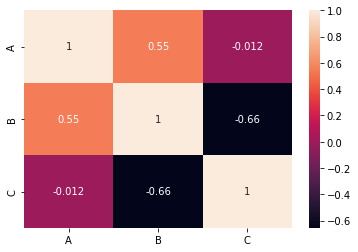

,A,B,C
A,1.000000,0.550024,-0.012020
B,0.550024,1.000000,-0.655231
C,-0.012020,-0.655231,1.000000


In [18]:
st.correlaciones(dsEst2, plot=True)

In [19]:
dfEst3= {
    'A':["1","2","3","4","5","6","7","8","9","10"],
    'B':["10", "20", "10", "10", "10", "30", "70", "80", "10", "90"],
    'C':['Verde', 'Amarillo', 'Azul', 'Amarillo', 'Verde', 'Rojo', 'Rojo', 'Rojo', 'Verde', 'Azul']
}
dsEst3 = ds.Dataset(dfEst3)

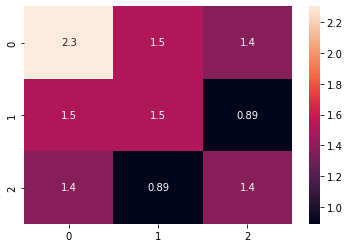

array([[2.30258509, 1.49786614, 1.36615885],
       [1.49786614, 1.49786614, 0.89102358],
       [1.36615885, 0.89102358, 1.36615885]])

In [20]:
st.infmutuas(dsEst3, plot=True)